In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Dataset = pd.read_csv("crime_data (1).csv")
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [5]:
#Preprocessing
data= Dataset.iloc[:,1:]
# normalization

def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [8]:
data_norm = norm(data)
data_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.cluster import KMeans

In [9]:
TWSS = []
k = list(range(2,9))
for i in k:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(data_norm)
    TWSS.append(Kmeans.inertia_)

In [10]:
TWSS

[6.596893867946199,
 5.010878493006419,
 3.683456153585915,
 3.2481504696143255,
 2.878317593771585,
 2.633492505670071,
 2.3240579857248083]

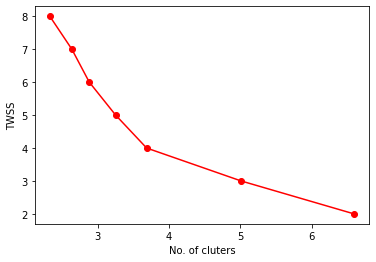

In [11]:
# scree plot

plt.plot(TWSS,k,'ro-');plt.xlabel("No. of cluters");plt.ylabel("TWSS")
plt.show()

In [13]:
# no. of clusters is 2

# create the model

model = KMeans(n_clusters = 2)
model.fit(data_norm)
model.labels_


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
Clust_labels = pd.Series(model.labels_)
Dataset['clust'] = Clust_labels
Dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [18]:
Dataset_new = Dataset.iloc[:,[5,0,1,2,3,4]]
Dataset_new

,clust,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6
5,1,Colorado,7.9,204,78,38.7
6,0,Connecticut,3.3,110,77,11.1
7,0,Delaware,5.9,238,72,15.8
8,1,Florida,15.4,335,80,31.9
9,1,Georgia,17.4,211,60,25.8


In [19]:
Dataset_new.to_csv("Crime_data_ans.csv")